VULL FER UN HISTOGRAMA DE TOT EL DATASET PER VEURE QUINES CLASSES COMPENSAR

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import pandas as pd

In [3]:
count = np.zeros(32)
root = 'data/CamVid/trainannot'

i = 0
for image in os.listdir(root): 
    i = i+1
    x = root + '/' + image
    if x.endswith('.png'):
        mask = cv2.imread(x)

        hist, bins = np.histogram(mask.ravel(),32,[0,31], density=True)
        count += hist
        
count = count / i

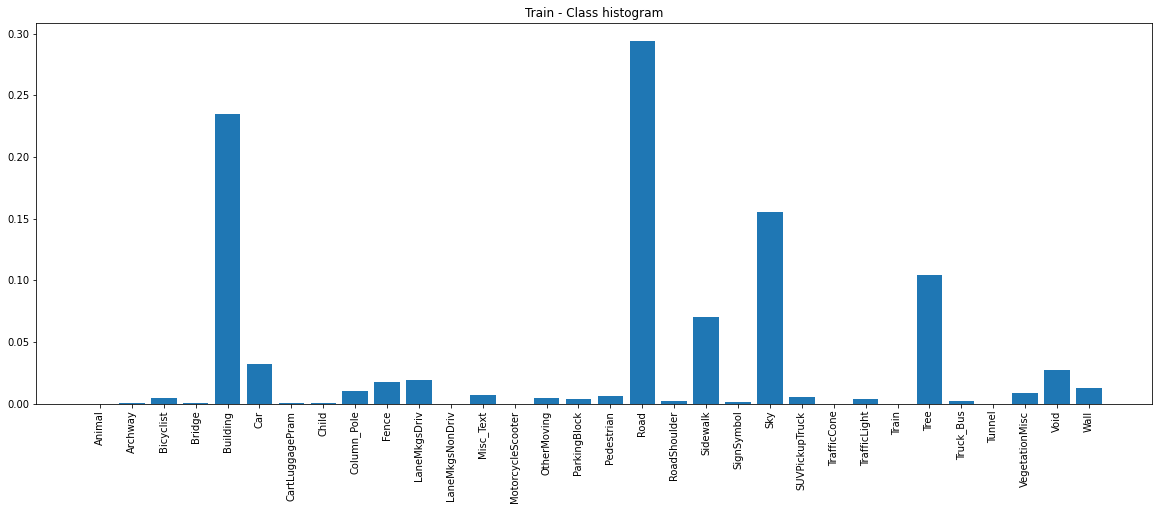

In [5]:
classes = pd.read_csv('data/CamVid/class_dict.csv', index_col = 0)
camvid_32classes = classes.index.tolist()

plt.figure(figsize = (20,7))
plt.title("Train - Class histogram")
plt.xticks(rotation=90)
plt.bar(camvid_32classes, count);


In [19]:
#Densitat
count

array([4.86171656e-05, 4.83903258e-04, 4.86921195e-03, 4.36279021e-04,
       2.34876437e-01, 3.21062756e-02, 2.66960509e-04, 3.22721915e-04,
       1.06627111e-02, 1.72131850e-02, 1.92435742e-02, 1.15401692e-04,
       6.75555394e-03, 5.68068068e-05, 4.83085101e-03, 3.62592028e-03,
       6.37439456e-03, 2.93859347e-01, 2.50498482e-03, 7.02825406e-02,
       1.33590849e-03, 1.55695014e-01, 5.44760083e-03, 3.98543705e-05,
       3.73406875e-03, 0.00000000e+00, 1.04219909e-01, 1.92255966e-03,
       1.61451774e-08, 8.43873309e-03, 2.70169565e-02, 1.26818795e-02])

In [9]:
class_weights = 1 / np.log(1.02 + count)
class_weights

array([50.37709764, 49.31713095, 40.70831432, 49.4309011 ,  4.40456626,
       19.68731361, 49.83971786, 49.70433059, 33.11038546, 27.36915128,
       25.97867107, 50.21149128, 37.87321724, 50.35673037, 40.77043804,
       42.82444766, 38.41339295,  3.66342136, 44.93274545, 11.56913654,
       47.3675831 ,  6.17819876, 39.79434124, 50.39890876, 42.63157118,
       50.49834979,  8.54048411, 46.11330423, 50.49830943, 35.66097365,
       21.7650938 , 31.09531559])

In [ ]:
#Dataset anterior
class_weights = torch.FloatTensor([ 6.25928686,  2.7317735 , 25.55606533,  6.36818039,  8.61882934,
       24.73534571, 38.51992017, 50.49834979,  7.34372151, 34.67235386,
       50.49834979, 10.49458649]).cuda()